# PyCBC Inference: A Python-based parameter estimation toolkit for compact-object merger signals

**C. M. Biwer<sup>1,2</sup>, Collin D. Capano<sup>3</sup>, Soumi De<sup>2</sup>, Miriam Cabero<sup>3</sup>, Duncan A. Brown<sup>2</sup>, Alexander H. Nitz<sup>3</sup>, V. Raymond<sup>4,5</sup>**

**<sup>1</sup>Los Alamos National Laboratory, Los Alamos, NM 87545, USA**

**<sup>2</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

**<sup>3</sup>Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany**

**<sup>4</sup>Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-14476 Potsdam, Germany**

**<sup>5</sup>School of Physics and Astronomy, Cardiff University, Cardiff, CF243AA, Wales, UK**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

The contents in this repository is a companion to the paper posted at [arXiv:1807.10312](https://arxiv.org/abs/1807.10312). We release posterior probability density files from the MCMC from running PyCBC inference on the gravitational-wave data for the binary black hole events GW150914, GW151226, and LVT151012, detected during LIGO's first observing run. We provide a notebook to demonstrate how to read these posterior files and reconstruct figures 4, 5 and 6 in the paper. We also provide the ini files and sample scripts with command lines to run the PyCBC inference parameter estimation analysis on the gravitational-wave data for the three events.

We encourage use of these data in derivative works. If you use the material provided here, please cite the paper using the reference:
```
@article{Biwer:2018,
      author         = "Biwer, C. M. and Capano, Collin D. and De, Soumi and
                        Cabero, Miriam and Brown, Duncan A. and Nitz, Alexander H. and Raymond, V.",
      title          = "{PyCBC Inference: A Python-based parameter estimation toolkit for compact-object merger signals}",
      year           = "2018",
      eprint         = "1807.10312",
      archivePrefix  = "arXiv",
      primaryClass   = "astro-ph.IM",
      SLACcitation   = "%%CITATION = ARXIV:1807.10312;%%"
}
```

The posterior samples from the PyCBC Inference analyses of GW150914, LVT151012, and GW151226 presented in the paper are stored in the folders ``posteriors/GW150914``, ``posteriors/LVT151012``, and ``posteriors/GW151226`` respectively in the files mentioned below. The data in these files contain the thinned posterior samples from the MCMC chains used to produce the posterior probability density and histogram plots :

 1. [gw150914_posteriors_thinned.hdf](https://github.com/gwastro/pycbc-inference-paper/blob/master/posteriors/gw150914_posteriors_thinned.hdf) contains the posterior samples from the MCMC for measuring properties of GW150914.
 2. [gw151226_posteriors_thinned.hdf](https://github.com/gwastro/pycbc-inference-paper/blob/master/posteriors/gw151226_posteriors_thinned.hdf) contains the posterior samples from the MCMC for measuring properties of GW151226.
 3. [lvt151012_posteriors_thinned.hdf](https://github.com/gwastro/pycbc-inference-paper/blob/master/posteriors/lvt151012_posteriors_thinned.hdf) contains the posterior samples from the MCMC for measuring properties of LVT151012.


The sample scripts with command lines and configuration files for performing the analyses presented in the paper for GW150914, LVT151012, and GW151226 can be found in the folders ``samples/GW150914``, ``samples/LVT151012``, and ``samples/GW151226`` respectively.

The results for the astrophysical events in the version-1 of the paper at [arxiv:1807.10312](https://arxiv.org/abs/1807.10312) were generated with the [PyCBC v1.9.4 release.](https://github.com/gwastro/pycbc/releases/tag/v1.9.4)

The results in the final version of the paper accepted to the Publications of the Astronomical Society of the Pacific were generated with the [PyCBC v1.12.3 release.](https://github.com/gwastro/pycbc/releases/tag/v1.12.3)

## Running this notebook in a Docker container

This notebook can be run from a PyCBC Docker container, or a machine with PyCBC installed. Instructions for [downloading the docker container](http://gwastro.github.io/pycbc/latest/html/docker.html) are available from the [PyCBC home page.](https://pycbc.org/) To start a container with instance of Jupyter notebook, run the commands
```sh
docker pull pycbc/pycbc-el7:v1.12.3
docker run -p 8888:8888 --name pycbc_notebook -it pycbc/pycbc-el7:v1.12.3 /bin/bash -l
```
Once the container has started, this git repository can be downloaded with the command:
```sh
git clone https://github.com/gwastro/pycbc-inference-paper.git
```
The notebook server can be started inside the container with the command:
```sh
jupyter notebook --ip 0.0.0.0 --no-browser
```
You can then connect to the notebook server at the URL printed by ``jupyter``. Navigate to the directory `pycbc-inference-paper` in the cloned git repository and open [data_release_pycbc-inference-paper_companion.ipynb](https://github.com/gwastro/pycbc-inference-paper/blob/master/data_release_pycbc-inference-paper_companion.ipynb) (this notebook).

## Imports

In [2]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pycbc.io.inference_hdf import InferenceFile
import numpy
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['font.size'] = 16

The data files store posteriors for the variable parameters ( `variable_args` ) in the MCMC. To check the parameter names that are stored in the posteriors file from the analysis of any of the events (say GW150914), use the appropriate file and do :

In [2]:
fp = h5py.File("posteriors/GW150914/gw150914_posteriors_thinned.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'mass1' 'mass2' 'spin1_a' 'spin1_azimuthal' 'spin1_polar' 'spin2_a'
 'spin2_azimuthal' 'spin2_polar' 'distance' 'inclination' 'polarization'
 'ra' 'dec']


Posteriors for the `variable_args` are stored inside the `samples` group of the hdf data files. PyCBC provides a handler class `pycbc.io.InferenceFile` that extends `h5py.File`. To read the output file and get samples for any of the `variable_args`, say `mass1`, do :

In [3]:
fp = InferenceFile("posteriors/GW150914/gw150914_posteriors_thinned.hdf", "r")
mass1_samples = fp['samples/mass1'][:]
print mass1_samples

[33.01314884 38.5140072  40.93454383 ... 36.42299098 28.62270073
 39.77869439]


Using the PyCBC software, one can map the posteriors for the `variable_args` to posteriors of other parameters. PyCBC has several functions that can be used to do the general transforms between parameters. You can look in `pycbc.conversions`, `pycbc.coordinates`, `pycbc.cosmology` for the possible transforms that you can do with the available `variable_args`. For example, to obtain the the chirp mass of the binary `mchirp` from the component masses `(mass1, mass2)` one would do :

In [4]:
from pycbc import conversions

fp=InferenceFile("posteriors/GW150914/gw150914_posteriors_thinned.hdf",'r')
mass1 = fp['samples/mass1'][:]
mass2 = fp['samples/mass2'][:]
fp.close()

mchirp = conversions.mchirp_from_mass1_mass2(mass1, mass2)
print mchirp

[31.26206031 29.98958888 30.91631345 ... 31.55720785 30.60857659
 31.23136371]


PyCBC has some common transforms pre-defined in the code, which can be used to derive some of the standard parameters from the `variable_args` parameters in the data file. For example, `( mass1, mass2 )` present in `variable_args` can be used to obtain derived parameters such as `mchirp` and `q`. The parameters whose posteriors are plotted below include some of such derived parameters. 

Below are examples that will plot posteriors from the PyCBC Inference analysis of GW150914 presented in Figures 4, 5 and 6 in the paper. 

For generating the the $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$ posteriors plot, we have utilized plotting functions from the module https://github.com/gwastro/pycbc/blob/v1.12.3/pycbc/results/scatter_histograms.py in PyCBC. 
To generate the $q - \chi_{\mathrm{eff}}$ and $d_L - \iota$ posteriors plots, we use the built-in plotting executable `pycbc_inference_plot_posterior` provided by PyCBC Inference that handles formatting and any necessary parameter conversions. Some formatting differences may be present, but if you're running a development version of PyCBC then you can adjust these as desired in the plotting code.

### Some plotting functions used in generating $m_1 - m_2$ posteriors 

In [3]:
import argparse
import logging
import numpy
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import pycbc
import pycbc.version
import sys
from matplotlib import patches
from matplotlib import pyplot
from pycbc.inference import option_utils, likelihood
from pycbc.io.inference_hdf import InferenceFile
from pycbc.results import metadata
from pycbc.results.scatter_histograms import create_multidim_plot
import numpy
import scipy.stats
import itertools
import matplotlib

from pycbc.results.scatter_histograms import construct_kde, create_axes_grid, get_scale_fac, create_marginalized_hist, set_marginal_histogram_title, remove_common_offset, reduce_ticks
# Only if a backend is not already set ... This should really *not* be done
# here, but in the executables you should set matplotlib.use()
# This matches the check that matplotlib does internally, but this *may* be
# version dependenant. If this is a problem then remove this and control from
# the executables directly.
#if not 'matplotlib.backends' in sys.modules:
#    matplotlib.use('agg')
from matplotlib import offsetbox
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
from pycbc.results import str_utils
from pycbc.io import FieldArray
import matplotlib.ticker as ticker



def create_multidim_plot(parameters, samples, labels=None,
                mins=None, maxs=None, expected_parameters=None,
                expected_parameters_color='r',
                plot_marginal=True, plot_scatter=True,
                marginal_percentiles=None, contour_percentiles=None,
                zvals=None, show_colorbar=True, cbar_label=None,
                vmin=None, vmax=None, scatter_cmap='plasma',
                plot_density=False, plot_contours=True,
                density_cmap='viridis',
                contour_color=None, hist_color='black',
                line_color=None, fill_color='gray',
                use_kombine=False, fig=None, axis_dict=None, grid_on=False):
    """Generate a figure with several plots and histograms.

    Parameters
    ----------
    parameters: list
        Names of the variables to be plotted.
    samples : FieldArray
        A field array of the samples to plot.
    labels: {None, list}, optional
        A list of names for the parameters.
    mins : {None, dict}, optional
        Minimum value for the axis of each variable in `parameters`.
        If None, it will use the minimum of the corresponding variable in
        `samples`.
    maxs : {None, dict}, optional
        Maximum value for the axis of each variable in `parameters`.
        If None, it will use the maximum of the corresponding variable in
        `samples`.
    expected_parameters : {None, dict}, optional
        Expected values of `parameters`, as a dictionary mapping parameter
        names -> values. A cross will be plotted at the location of the
        expected parameters on axes that plot any of the expected parameters.
    expected_parameters_color : {'r', string}, optional
        What color to make the expected parameters cross.
    plot_marginal : {True, bool}
        Plot the marginalized distribution on the diagonals. If False, the
        diagonal axes will be turned off.
    plot_scatter : {True, bool}
        Plot each sample point as a scatter plot.
    marginal_percentiles : {None, array}
        What percentiles to draw lines at on the 1D histograms.
        If None, will draw lines at `[5, 50, 95]` (i.e., the bounds on the
        upper 90th percentile and the median).
    contour_percentiles : {None, array}
        What percentile contours to draw on the scatter plots. If None,
        will plot the 50th and 90th percentiles.
    zvals : {None, array}
        An array to use for coloring the scatter plots. If None, scatter points
        will be the same color.
    show_colorbar : {True, bool}
        Show the colorbar of zvalues used for the scatter points. A ValueError
        will be raised if zvals is None and this is True.
    cbar_label : {None, str}
        Specify a label to add to the colorbar.
    vmin: {None, float}, optional
        Minimum value for the colorbar. If None, will use the minimum of zvals.
    vmax: {None, float}, optional
        Maximum value for the colorbar. If None, will use the maxmimum of
        zvals.
    scatter_cmap : {'plasma', string}
        The color map to use for the scatter points. Default is 'plasma'.
    plot_density : {False, bool}
        Plot the density of points as a color map.
    plot_contours : {True, bool}
        Draw contours showing the 50th and 90th percentile confidence regions.
    density_cmap : {'viridis', string}
        The color map to use for the density plot.
    contour_color : {None, string}
        The color to use for the contour lines. Defaults to white for
        density plots, navy for scatter plots without zvals, and black
        otherwise.
    use_kombine : {False, bool}
        Use kombine's KDE to calculate density. Otherwise, will use
        `scipy.stats.gaussian_kde.` Default is False.

    Returns
    -------
    fig : pyplot.figure
        The figure that was created.
    axis_dict : dict
        A dictionary mapping the parameter combinations to the axis and their
        location in the subplots grid; i.e., the key, values are:
        `{('param1', 'param2'): (pyplot.axes, row index, column index)}`
    """
    if labels is None:
        labels = [p for p in parameters]
    # turn labels into a dict for easier access
    labels = dict(zip(parameters, labels))
    # set up the figure with a grid of axes
    # if only plotting 2 parameters, make the marginal plots smaller
    nparams = len(parameters)
    if nparams == 2:
        width_ratios = [3,1]
        height_ratios = [1,3]
    else:
        width_ratios = height_ratios = None


    # convert samples to a dictionary to avoid re-computing derived parameters
    # every time they are needed
    samples = dict([[p, samples[p]] for p in parameters])

    # values for axis bounds
    if mins is None:
        mins = {p:samples[p].min() for p in parameters}
    else:
        # copy the dict
        mins = {p:val for p,val in mins.items()}
    if maxs is None:
        maxs = {p:samples[p].max() for p in parameters}
    else:
        # copy the dict
        maxs = {p:val for p,val in maxs.items()}

    # remove common offsets
    for pi,param in enumerate(parameters):
        values, offset = remove_common_offset(samples[param])
        if offset != 0:
            # we'll add the offset removed to the label
            labels[param] = '{} - {:d}'.format(labels[param], offset)
            samples[param] = values
            mins[param] = mins[param] - float(offset)
            maxs[param] = maxs[param] - float(offset)

    # create the axis grid
    if fig is None and axis_dict is None:
        fig, axis_dict = create_axes_grid(
            parameters, labels=labels,
            width_ratios=width_ratios, height_ratios=height_ratios,
            no_diagonals=not plot_marginal)
        
    # Diagonals...
    if plot_marginal:
        for pi,param in enumerate(parameters):
            ax, _, _ = axis_dict[param, param]
            # if only plotting 2 parameters and on the second parameter,
            # rotate the marginal plot
            rotated = nparams == 2 and pi == nparams-1
            # see if there are expected values
            if expected_parameters is not None:
                try:
                    expected_value = expected_parameters[param]
                except KeyError:
                    expected_value = None
            else:
                expected_value = None
            create_marginalized_hist(ax, samples[param], label=labels[param],
                color=hist_color, fillcolor=fill_color, linecolor=line_color,
                title=True, expected_value=expected_value,
                expected_color=expected_parameters_color,
                rotated=rotated, plot_min=mins[param], plot_max=maxs[param],
                percentiles=marginal_percentiles)

    # Off-diagonals...
    for px, py in axis_dict:
        if px == py:
            continue
        ax, _, _ = axis_dict[px, py]

        if plot_contours or plot_density:
            # Exclude out-of-bound regions
            # this is a bit kludgy; should probably figure out a better
            # solution to eventually allow for more than just m_p m_s
            if (px == 'm_p' and py == 'm_s') or (py == 'm_p' and px == 'm_s'):
                exclude_region = 'm_s > m_p'
            else:
                exclude_region = None
            create_density_plot(px, py, samples, plot_density=plot_density,
                    plot_contours=plot_contours, cmap=density_cmap,
                    percentiles=contour_percentiles,
                    contour_color=contour_color, xmin=mins[px], xmax=maxs[px],
                    ymin=mins[py], ymax=maxs[py],
                    exclude_region=exclude_region, ax=ax,
                    use_kombine=use_kombine, grid_on=grid_on)

        ax.set_xlim(mins[px], maxs[px])
        ax.set_ylim(mins[py], maxs[py])

    # adjust tick number for large number of plots
    if len(parameters) > 3:
        for px, py in axis_dict:
            ax, _, _ = axis_dict[px, py]
            ax.set_xticks(reduce_ticks(ax, 'x', maxticks=3))
            ax.set_yticks(reduce_ticks(ax, 'y', maxticks=3))

    return fig, axis_dict



## To plot Fig. 4 of the paper : GW150914 posteriors

### Fig 4a : posterior density plot for $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$

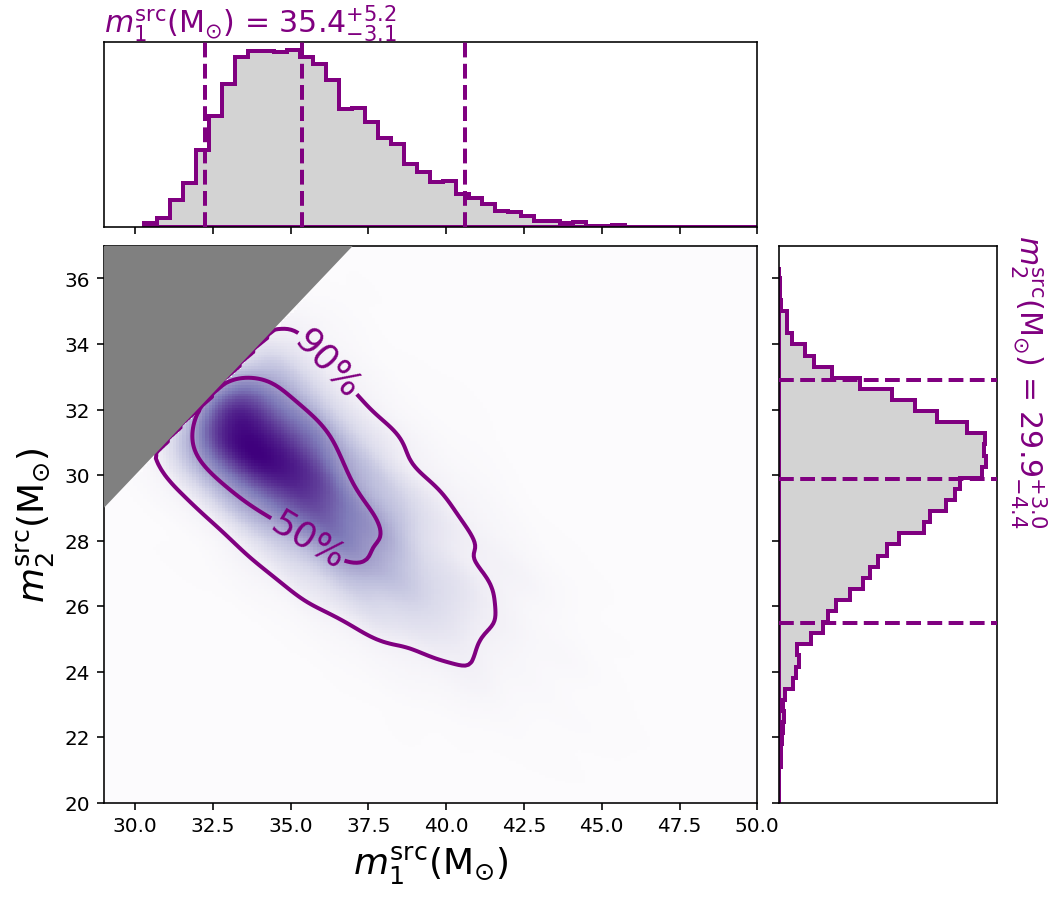

In [5]:
def create_density_plot(xparam, yparam, samples, plot_density=True,
        plot_contours=True, percentiles=None, cmap='viridis',
        contour_color=None, xmin=None, xmax=None, ymin=None, ymax=None,
        exclude_region=None, fig=None, ax=None, use_kombine=False, grid_on=False):
    """Computes and plots posterior density and confidence intervals using the
    given samples.

    Parameters
    ----------
    xparam : string
        The parameter to plot on the x-axis.
    yparam : string
        The parameter to plot on the y-axis.
    samples : dict, numpy structured array, or FieldArray
        The samples to plot.
    plot_density : {True, bool}
        Plot a color map of the density.
    plot_contours : {True, bool}
        Plot contours showing the n-th percentiles of the density.
    percentiles : {None, float or array}
        What percentile contours to draw. If None, will plot the 50th
        and 90th percentiles.
    cmap : {'viridis', string}
        The name of the colormap to use for the density plot.
    contour_color : {None, string}
        What color to make the contours. Default is white for density
        plots and black for other plots.
    xmin : {None, float}
        Minimum value to plot on x-axis.
    xmax : {None, float}
        Maximum value to plot on x-axis.
    ymin : {None, float}
        Minimum value to plot on y-axis.
    ymax : {None, float}
        Maximum value to plot on y-axis.
    exclue_region : {None, str}
        Exclude the specified region when plotting the density or contours.
        Must be a string in terms of `xparam` and `yparam` that is
        understandable by numpy's logical evaluation. For example, if
        `xparam = m_1` and `yparam = m_2`, and you want to exclude the region
        for which `m_2` is greater than `m_1`, then exclude region should be
        `'m_2 > m_1'`.
    fig : {None, pyplot.figure}
        Add the plot to the given figure. If None and ax is None, will create
        a new figure.
    ax : {None, pyplot.axes}
        Draw plot on the given axis. If None, will create a new axis from
        `fig`.
    use_kombine : {False, bool}
        Use kombine's KDE to calculate density. Otherwise, will use
        `scipy.stats.gaussian_kde.` Default is False.

    Returns
    -------
    fig : pyplot.figure
        The figure the plot was made on.
    ax : pyplot.axes
        The axes the plot was drawn on.
    """
    if percentiles is None:
        percentiles = numpy.array([50., 90.])
    percentiles = 100. - numpy.array(percentiles)
    percentiles.sort()
    if ax is None and fig is None:
        fig = pyplot.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    if grid_on:
        ax.grid(True, linestyle='dotted', color='darkgray')
    # convert samples to array and construct kde
    xsamples = samples[xparam]
    ysamples = samples[yparam]
    arr = numpy.vstack((xsamples, ysamples)).T
    kde = construct_kde(arr, use_kombine=use_kombine)

    # construct grid to evaluate on
    if xmin is None:
        xmin = xsamples.min()
    if xmax is None:
        xmax = xsamples.max()
    if ymin is None:
        ymin = ysamples.min()
    if ymax is None:
        ymax = ysamples.max()
    npts = 200
    X, Y = numpy.mgrid[xmin:xmax:complex(0,npts), ymin:ymax:complex(0,npts)] # pylint:disable=invalid-slice-index
    X_ravel = X.ravel()
    Y_ravel = Y.ravel()
    pos = numpy.vstack([X_ravel, Y_ravel])

    Z_ravel = kde(pos).T
    draw = kde.resample


    for i in range(len(X_ravel)):
        if X_ravel[i] <= Y_ravel[i]:
            Z_ravel[i] = 0
    X = X_ravel.reshape(X.shape)
    Y = Y_ravel.reshape(X.shape)
    Z = Z_ravel.reshape(X.shape)
    
    if plot_density:
        ax.imshow(numpy.rot90(Z), extent=[xmin, xmax, ymin, ymax],
            aspect='auto', cmap=cmap, zorder=1)
        if contour_color is None:
            contour_color = 'w'
            
    if plot_contours:
        # compute the percentile values
        resamps = kde(draw(int(npts**2)))
        if use_kombine:
            resamps = numpy.exp(resamps)
        s = numpy.percentile(resamps, percentiles)
        if contour_color is None:
            contour_color = 'k'
        lw = 2
        ct = ax.contour(X, Y, Z, s, colors=contour_color, linewidths=lw, linestyles='solid',
                        zorder=3)
        
        # label contours
        lbls = ['{p}%'.format(p=int(p)) for p in (100. - percentiles)]
        
        fmt = dict(zip(ct.levels, lbls))
        fs = 18
        ax.clabel(ct, ct.levels, inline=True, fmt=fmt, fontsize=fs)
        
        x=numpy.linspace(29, 50, num=50)
        y1=x
        ax.fill_between(x, x, 37, facecolor='gray', zorder=10)

    return fig, ax


sys.argv = ['foo']
parser = argparse.ArgumentParser()

opts = parser.parse_args()
opts.output_file = 'm1m2source_gw150914.png'
opts.input_file = ['posteriors/GW150914/gw150914_posteriors_thinned.hdf']
opts.plot_marginal = True
opts.plot_contour = True
opts.plot_density = True
opts.z_arg = "logplr"
opts.density_cmap = "Purples"
opts.parameters = ['primary_mass(mass1, mass2)/(1+redshift):$m_1^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$', 'secondary_mass(mass1, mass2)/(1+redshift):$m_2^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$']
opts.maxs=['primary_mass(mass1, mass2)/(1+redshift):50', 'secondary_mass(mass1, mass2)/(1+redshift):37']
opts.mins=['primary_mass(mass1, mass2)/(1+redshift):29', 'secondary_mass(mass1, mass2)/(1+redshift):20']
opts.thin_start = None
opts.thin_interval=None
opts.thin_end = None
opts.iteration =None
opts.parameters_group='samples'
opts.marginal_percentiles=None

# add options for what plots to create
option_utils.add_plot_posterior_option_group(parser)

# density configuration
option_utils.add_density_option_group(parser)

# add standard option utils
option_utils.add_inference_results_option_group(parser)

# get parameters
fp, parameters, labels, samples = option_utils.results_from_cli(opts)

mins, maxs = option_utils.plot_ranges_from_cli(opts)


fig = None
axis_dict = None
fill_color = "lightgray"
zvals = []
zlbl = []

likelihood_stats = fp.read_likelihood_stats(
                        thin_start=opts.thin_start, thin_end=opts.thin_end,
                        thin_interval=opts.thin_interval, iteration=opts.iteration)
f_zvals, f_zlbl = option_utils.get_zvalues(fp, opts.z_arg, likelihood_stats)

zvals.append(f_zvals)
zlbl.append(f_zlbl)
fp.close()

contour_color = "purple"

# make histogram black lines if only one
hist_color = contour_color
# pick a new color for each input file
linecolor = contour_color

# plot
fig, axis_dict = create_multidim_plot(
                    parameters, samples, labels=labels, fig=fig, axis_dict=axis_dict,
                    marginal_percentiles=opts.marginal_percentiles,
                    zvals=zvals if zvals is not None else None,
                    plot_density=opts.plot_density,
                    plot_contours=opts.plot_contour,
                    density_cmap=opts.density_cmap,
                    contour_color=contour_color,
                    hist_color=hist_color,
                    line_color=contour_color,
                    fill_color=fill_color,
                    mins=mins, maxs=maxs)
    
    
fig.show()

### Fig 4b : posterior density plot for $q - \chi_{\mathrm{eff}}$

In [40]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW150914/gw150914_posteriors_thinned.hdf \
    --output-file q_chieff_gw150914.png \
    --plot-density \
    --density-cmap Purples \
    --z-arg logplr \
    --plot-contours \
    --contour-color purple \
    --plot-marginal \
    --parameters "(primary_mass(mass1, mass2))/(secondary_mass(mass1, mass2)):\$q$" \
                 chi_eff \
    --contour-color "purple" \
    --maxs "(primary_mass(mass1, mass2))/(secondary_mass(mass1, mass2)):2"

2018-12-06 22:22:57,118 Loading parameters
2018-12-06 22:22:57,118 Reading input file posteriors/GW150914/gw150914_posteriors_thinned.hdf
2018-12-06 22:22:57,122 Loading samples
2018-12-06 22:22:57,214 Getting likelihood stats
2018-12-06 22:22:57,220 Plotting
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-12-06 22:23:04,200 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/mpl-data/fon

2018-12-06 22:23:04,942 STREAM 'IHDR' 16 13
2018-12-06 22:23:04,942 STREAM 'sBIT' 41 4
2018-12-06 22:23:04,942 'sBIT' 41 4 (unknown)
2018-12-06 22:23:04,942 STREAM 'pHYs' 57 9
2018-12-06 22:23:04,942 STREAM 'tEXt' 78 57
2018-12-06 22:23:04,942 STREAM 'IDAT' 147 8192
2018-12-06 22:23:05,145 Done


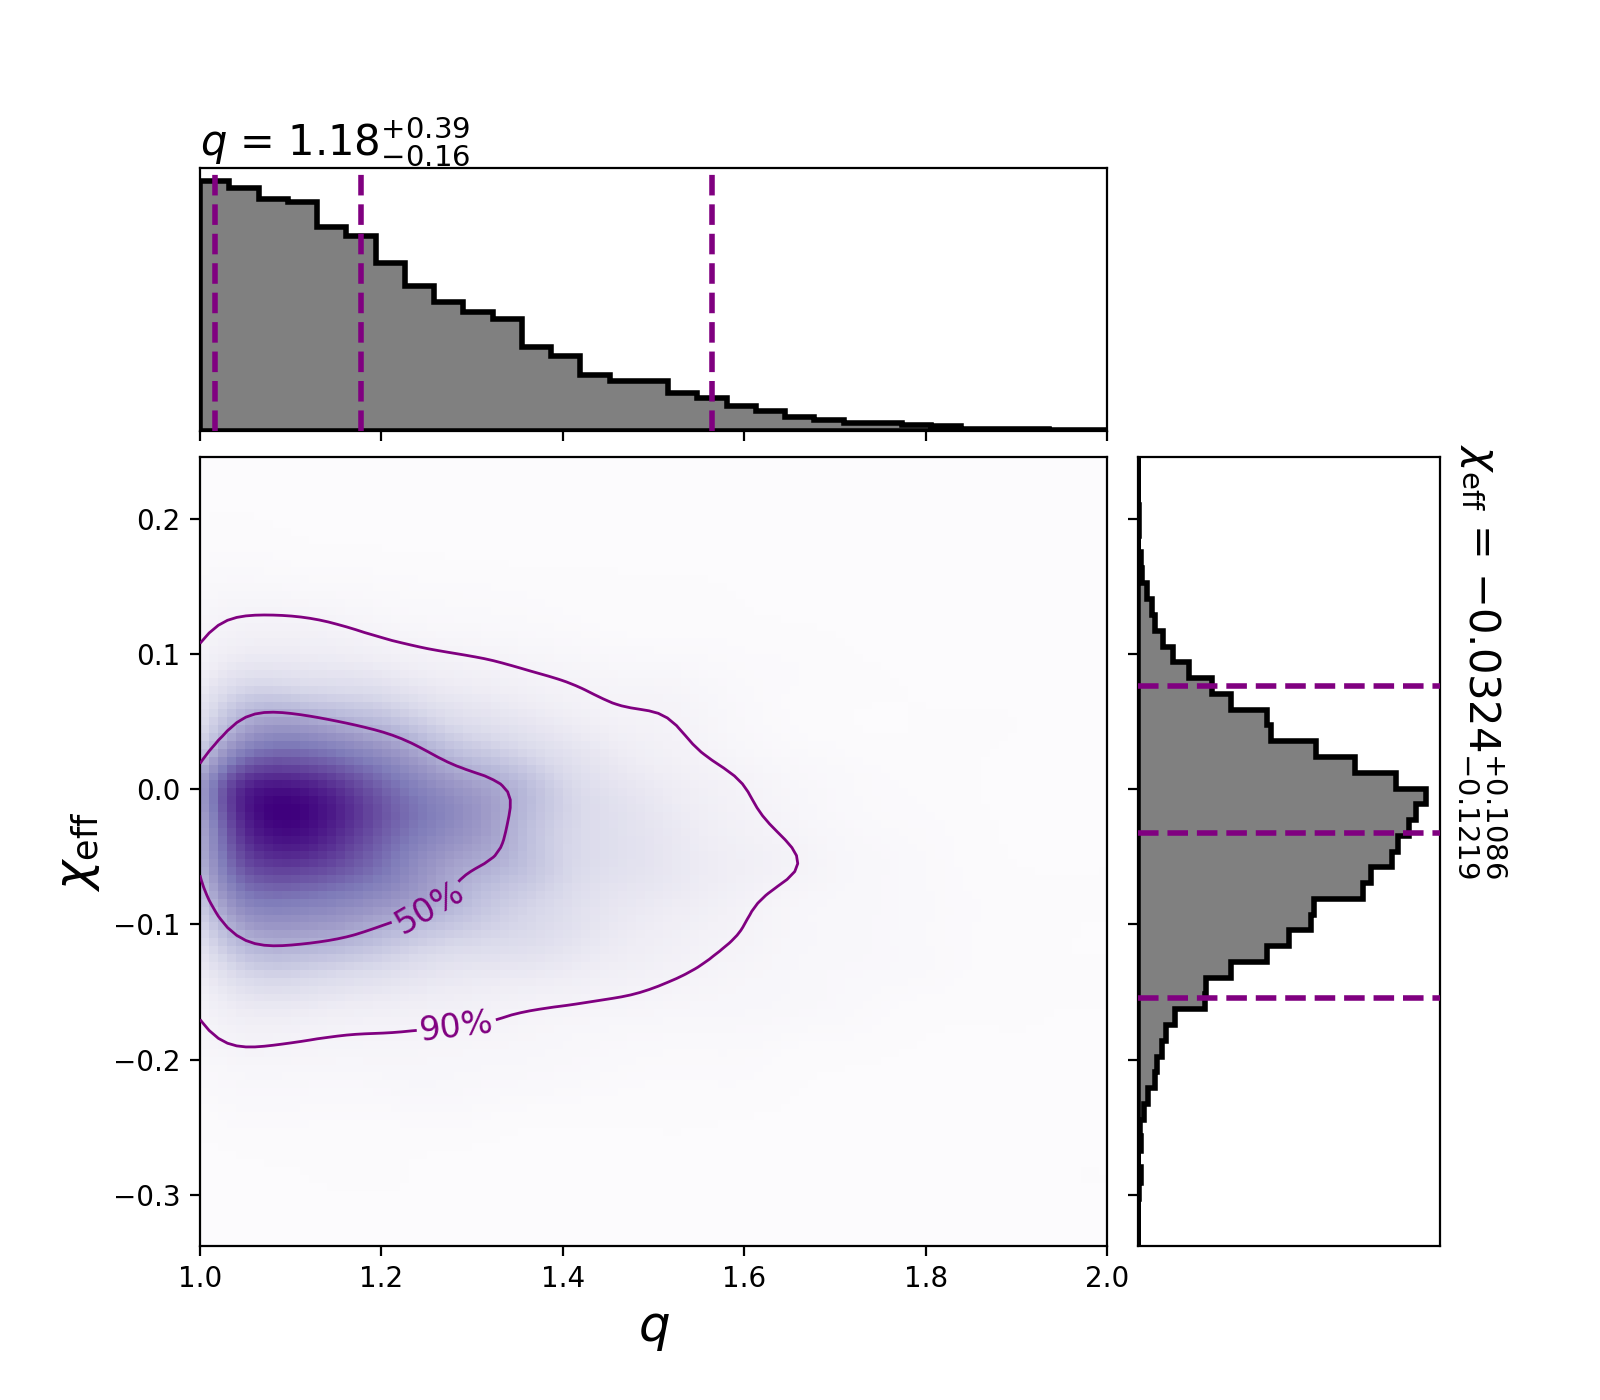

In [41]:
Image('q_chieff_gw150914.png')

### Fig 4c : posterior density plot for $\iota - d_L$

In [9]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW150914/gw150914_posteriors_thinned.hdf \
    --output-file iota_dl_gw150914.png \
    --plot-density \
    --density-cmap Purples \
    --z-arg logplr \
    --plot-contours \
    --contour-color purple \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180" \

2018-07-22 16:21:36,323 Loading parameters
2018-07-22 16:21:36,323 Reading input file posteriors/GW150914/gw150914_posteriors_thinned.hdf
2018-07-22 16:21:36,326 Loading samples
2018-07-22 16:21:36,333 Getting likelihood stats
2018-07-22 16:21:36,339 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.12.1/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasis.opensciencegrid.org/lig

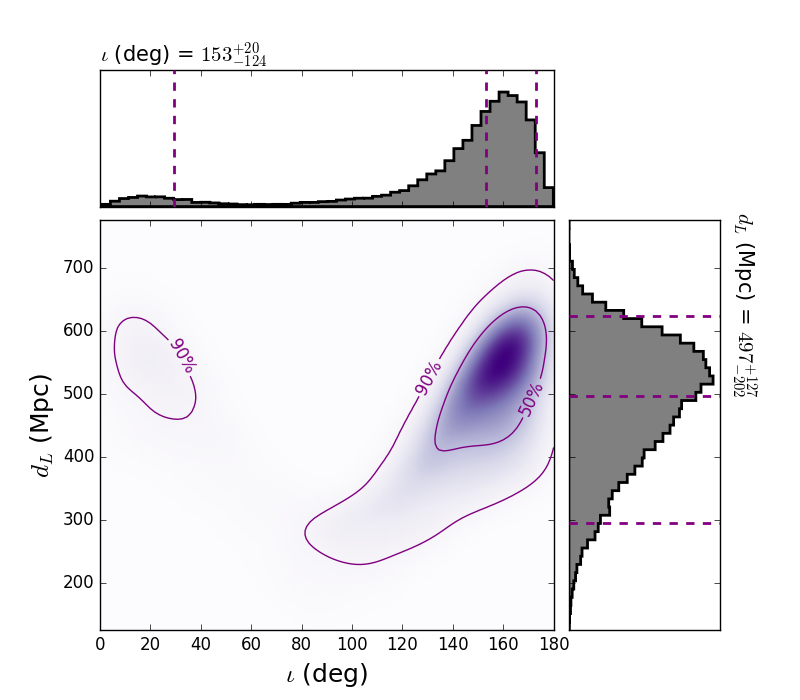

In [10]:
Image('iota_dl_gw150914.png')

## To plot Fig. 5 of the paper : GW151226 posteriors

### Fig 5a : posterior density plot for $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$

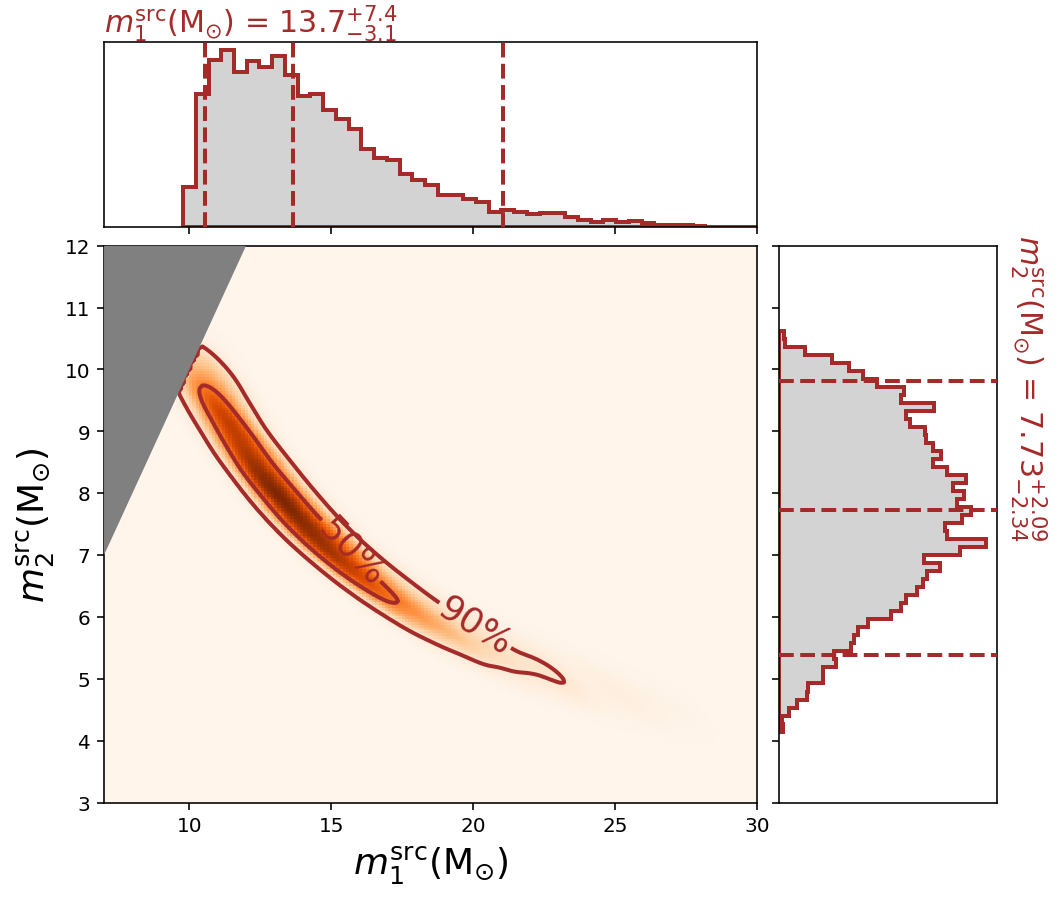

In [6]:
def create_density_plot(xparam, yparam, samples, plot_density=True,
        plot_contours=True, percentiles=None, cmap='viridis',
        contour_color=None, xmin=None, xmax=None, ymin=None, ymax=None,
        exclude_region=None, fig=None, ax=None, use_kombine=False, grid_on=False):
    """Computes and plots posterior density and confidence intervals using the
    given samples.

    Parameters
    ----------
    xparam : string
        The parameter to plot on the x-axis.
    yparam : string
        The parameter to plot on the y-axis.
    samples : dict, numpy structured array, or FieldArray
        The samples to plot.
    plot_density : {True, bool}
        Plot a color map of the density.
    plot_contours : {True, bool}
        Plot contours showing the n-th percentiles of the density.
    percentiles : {None, float or array}
        What percentile contours to draw. If None, will plot the 50th
        and 90th percentiles.
    cmap : {'viridis', string}
        The name of the colormap to use for the density plot.
    contour_color : {None, string}
        What color to make the contours. Default is white for density
        plots and black for other plots.
    xmin : {None, float}
        Minimum value to plot on x-axis.
    xmax : {None, float}
        Maximum value to plot on x-axis.
    ymin : {None, float}
        Minimum value to plot on y-axis.
    ymax : {None, float}
        Maximum value to plot on y-axis.
    exclue_region : {None, str}
        Exclude the specified region when plotting the density or contours.
        Must be a string in terms of `xparam` and `yparam` that is
        understandable by numpy's logical evaluation. For example, if
        `xparam = m_1` and `yparam = m_2`, and you want to exclude the region
        for which `m_2` is greater than `m_1`, then exclude region should be
        `'m_2 > m_1'`.
    fig : {None, pyplot.figure}
        Add the plot to the given figure. If None and ax is None, will create
        a new figure.
    ax : {None, pyplot.axes}
        Draw plot on the given axis. If None, will create a new axis from
        `fig`.
    use_kombine : {False, bool}
        Use kombine's KDE to calculate density. Otherwise, will use
        `scipy.stats.gaussian_kde.` Default is False.

    Returns
    -------
    fig : pyplot.figure
        The figure the plot was made on.
    ax : pyplot.axes
        The axes the plot was drawn on.
    """
    if percentiles is None:
        percentiles = numpy.array([50., 90.])
    percentiles = 100. - numpy.array(percentiles)
    percentiles.sort()
    if ax is None and fig is None:
        fig = pyplot.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    if grid_on:
        ax.grid(True, linestyle='dotted', color='darkgray')
    # convert samples to array and construct kde
    xsamples = samples[xparam]
    ysamples = samples[yparam]
    arr = numpy.vstack((xsamples, ysamples)).T
    kde = construct_kde(arr, use_kombine=use_kombine)

    # construct grid to evaluate on
    if xmin is None:
        xmin = xsamples.min()
    if xmax is None:
        xmax = xsamples.max()
    if ymin is None:
        ymin = ysamples.min()
    if ymax is None:
        ymax = ysamples.max()
    npts = 200
    X, Y = numpy.mgrid[xmin:xmax:complex(0,npts), ymin:ymax:complex(0,npts)] # pylint:disable=invalid-slice-index
    X_ravel = X.ravel()
    Y_ravel = Y.ravel()
    pos = numpy.vstack([X_ravel, Y_ravel])

    Z_ravel = kde(pos).T
    draw = kde.resample


    for i in range(len(X_ravel)):
        if X_ravel[i] <= Y_ravel[i]:
            Z_ravel[i] = 0
    X = X_ravel.reshape(X.shape)
    Y = Y_ravel.reshape(X.shape)
    Z = Z_ravel.reshape(X.shape)
    
    if plot_density:
        ax.imshow(numpy.rot90(Z), extent=[xmin, xmax, ymin, ymax],
            aspect='auto', cmap=cmap, zorder=1)
        if contour_color is None:
            contour_color = 'w'
            
    if plot_contours:
        # compute the percentile values
        resamps = kde(draw(int(npts**2)))
        if use_kombine:
            resamps = numpy.exp(resamps)
        s = numpy.percentile(resamps, percentiles)
        if contour_color is None:
            contour_color = 'k'
        lw = 2
        ct = ax.contour(X, Y, Z, s, colors=contour_color, linewidths=lw, linestyles='solid',
                        zorder=3)
        
        # label contours
        lbls = ['{p}%'.format(p=int(p)) for p in (100. - percentiles)]
        
        fmt = dict(zip(ct.levels, lbls))
        fs = 18
        ax.clabel(ct, ct.levels, inline=True, fmt=fmt, fontsize=fs)
        
        x=numpy.linspace(7, 30, num=50)
        y1=x
        ax.fill_between(x, x, 12, facecolor='gray', zorder=10)

    return fig, ax


sys.argv = ['foo']
parser = argparse.ArgumentParser()

opts = parser.parse_args()
opts.output_file = 'm1m2source_gw151226.png'
opts.input_file = ['posteriors/GW151226/gw151226_posteriors_thinned.hdf']
opts.plot_marginal = True
opts.plot_contour = True
opts.plot_density = True
opts.z_arg = "logplr"
opts.density_cmap = "Oranges"
opts.parameters = ['primary_mass(mass1, mass2)/(1+redshift):$m_1^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$', 'secondary_mass(mass1, mass2)/(1+redshift):$m_2^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$']
opts.maxs=['primary_mass(mass1, mass2)/(1+redshift):30', 'secondary_mass(mass1, mass2)/(1+redshift):12']
opts.mins=['primary_mass(mass1, mass2)/(1+redshift):7', 'secondary_mass(mass1, mass2)/(1+redshift):3']
opts.thin_start = None
opts.thin_interval=None
opts.thin_end = None
opts.iteration =None
opts.parameters_group='samples'
opts.marginal_percentiles=None

# add options for what plots to create
option_utils.add_plot_posterior_option_group(parser)

# density configuration
option_utils.add_density_option_group(parser)

# add standard option utils
option_utils.add_inference_results_option_group(parser)

# get parameters
fp, parameters, labels, samples = option_utils.results_from_cli(opts)

mins, maxs = option_utils.plot_ranges_from_cli(opts)


fig = None
axis_dict = None
fill_color = "lightgray"
zvals = []
zlbl = []

likelihood_stats = fp.read_likelihood_stats(
                        thin_start=opts.thin_start, thin_end=opts.thin_end,
                        thin_interval=opts.thin_interval, iteration=opts.iteration)
f_zvals, f_zlbl = option_utils.get_zvalues(fp, opts.z_arg, likelihood_stats)

zvals.append(f_zvals)
zlbl.append(f_zlbl)
fp.close()

contour_color = "brown"

# make histogram black lines if only one
hist_color = contour_color
# pick a new color for each input file
linecolor = contour_color

# plot
fig, axis_dict = create_multidim_plot(
                    parameters, samples, labels=labels, fig=fig, axis_dict=axis_dict,
                    marginal_percentiles=opts.marginal_percentiles,
                    zvals=zvals if zvals is not None else None,
                    plot_density=opts.plot_density,
                    plot_contours=opts.plot_contour,
                    density_cmap=opts.density_cmap,
                    contour_color=contour_color,
                    hist_color=hist_color,
                    line_color=contour_color,
                    fill_color=fill_color,
                    mins=mins, maxs=maxs)
    
    
fig.show()

### Fig 5b : posterior density plot for $q - \chi_{\mathrm{eff}}$

In [31]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW151226/gw151226_posteriors_thinned.hdf \
    --output-file q_chieff_gw151226.png \
    --plot-density \
    --density-cmap Oranges \
    --z-arg logplr \
    --plot-contours \
    --contour-color brown \
    --plot-marginal \
    --parameters "primary_mass(mass1,mass2)/secondary_mass(mass1,mass2):\$q$" \
                 chi_eff \
    --maxs "primary_mass(mass1,mass2)/secondary_mass(mass1,mass2):6" \
           chi_eff:0.5 \

2018-12-06 22:13:28,042 Loading parameters
2018-12-06 22:13:28,042 Reading input file posteriors/GW151226/gw151226_posteriors_thinned.hdf
2018-12-06 22:13:28,048 Loading samples
2018-12-06 22:13:28,132 Getting likelihood stats
2018-12-06 22:13:28,139 Plotting
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-12-06 22:13:35,422 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/mpl-data/fon

2018-12-06 22:13:36,246 STREAM 'IHDR' 16 13
2018-12-06 22:13:36,247 STREAM 'sBIT' 41 4
2018-12-06 22:13:36,247 'sBIT' 41 4 (unknown)
2018-12-06 22:13:36,247 STREAM 'pHYs' 57 9
2018-12-06 22:13:36,247 STREAM 'tEXt' 78 57
2018-12-06 22:13:36,247 STREAM 'IDAT' 147 8192
2018-12-06 22:13:36,469 Done


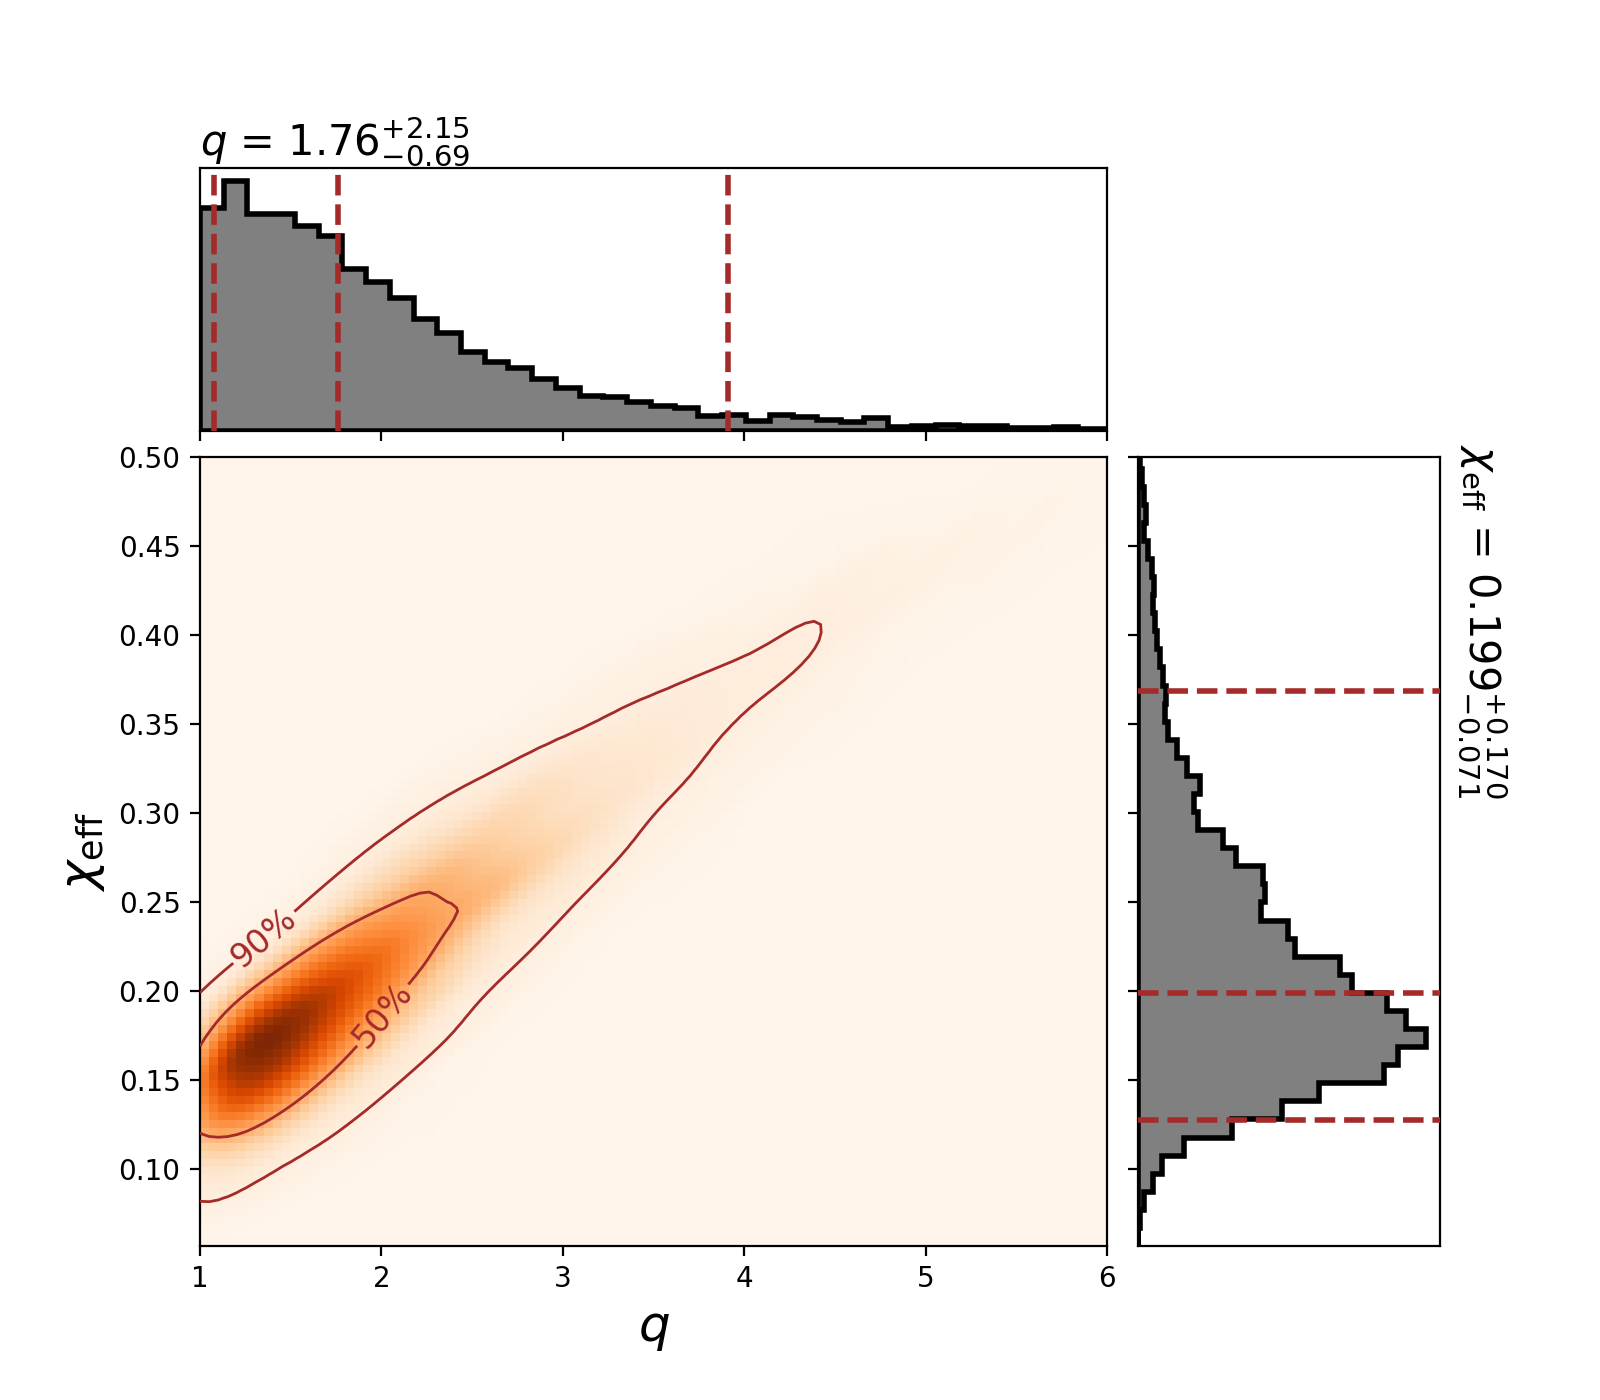

In [32]:
Image('q_chieff_gw151226.png')

### Fig 5c : posterior density plot for $\iota - d_L$

In [15]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/GW151226/gw151226_posteriors_thinned.hdf \
    --output-file iota_dl_gw151226.png \
    --plot-density \
    --density-cmap Oranges \
    --z-arg logplr \
    --plot-contours \
    --contour-color brown \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180"

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:09:35,334 Loading parameters
2018-07-22 16:09:35,334 Reading input file posteriors/GW151226/gw151226_posteriors_thinned.hdf
2018-07-22 16:09:35,336 Loading samples
2018-07-22 16:09:35,340 Getting likelihood stats
2018-07-22 16:09:35,343 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oasi

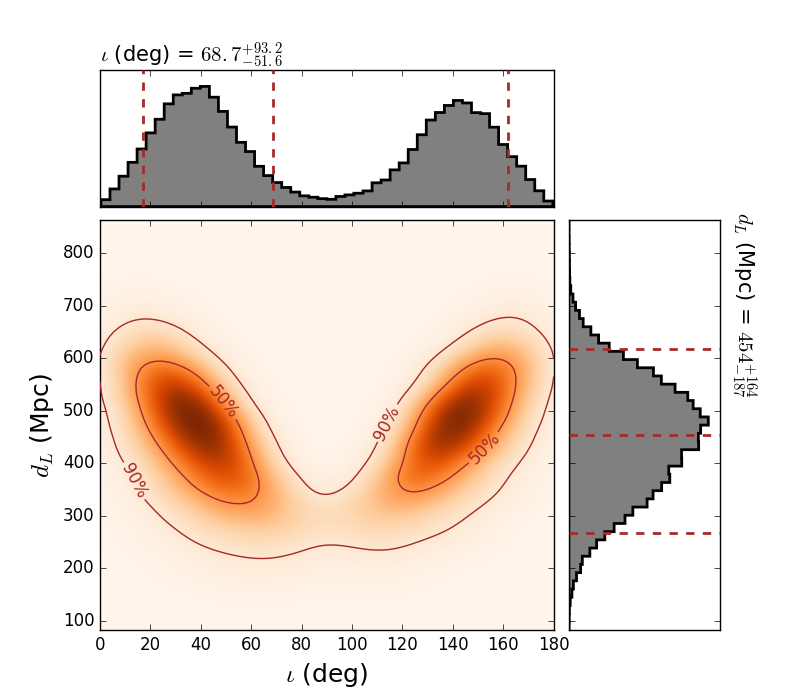

In [16]:
Image('iota_dl_gw151226.png')

## To plot Fig. 6 of the paper : LVT151012 posteriors

### Fig 6a : posterior density plot for $m_1^{\mathrm{src}} - m_2^{\mathrm{src}}$

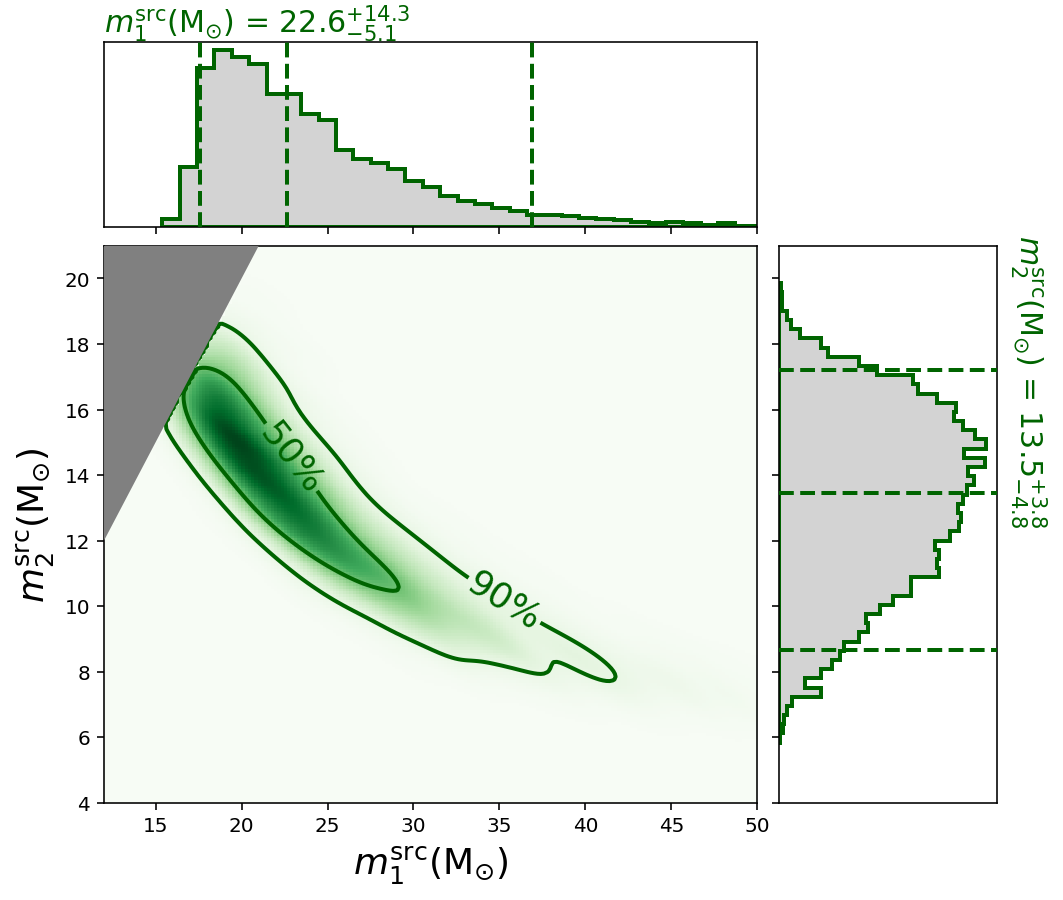

In [7]:
def create_density_plot(xparam, yparam, samples, plot_density=True,
        plot_contours=True, percentiles=None, cmap='viridis',
        contour_color=None, xmin=None, xmax=None, ymin=None, ymax=None,
        exclude_region=None, fig=None, ax=None, use_kombine=False, grid_on=False):
    """Computes and plots posterior density and confidence intervals using the
    given samples.

    Parameters
    ----------
    xparam : string
        The parameter to plot on the x-axis.
    yparam : string
        The parameter to plot on the y-axis.
    samples : dict, numpy structured array, or FieldArray
        The samples to plot.
    plot_density : {True, bool}
        Plot a color map of the density.
    plot_contours : {True, bool}
        Plot contours showing the n-th percentiles of the density.
    percentiles : {None, float or array}
        What percentile contours to draw. If None, will plot the 50th
        and 90th percentiles.
    cmap : {'viridis', string}
        The name of the colormap to use for the density plot.
    contour_color : {None, string}
        What color to make the contours. Default is white for density
        plots and black for other plots.
    xmin : {None, float}
        Minimum value to plot on x-axis.
    xmax : {None, float}
        Maximum value to plot on x-axis.
    ymin : {None, float}
        Minimum value to plot on y-axis.
    ymax : {None, float}
        Maximum value to plot on y-axis.
    exclue_region : {None, str}
        Exclude the specified region when plotting the density or contours.
        Must be a string in terms of `xparam` and `yparam` that is
        understandable by numpy's logical evaluation. For example, if
        `xparam = m_1` and `yparam = m_2`, and you want to exclude the region
        for which `m_2` is greater than `m_1`, then exclude region should be
        `'m_2 > m_1'`.
    fig : {None, pyplot.figure}
        Add the plot to the given figure. If None and ax is None, will create
        a new figure.
    ax : {None, pyplot.axes}
        Draw plot on the given axis. If None, will create a new axis from
        `fig`.
    use_kombine : {False, bool}
        Use kombine's KDE to calculate density. Otherwise, will use
        `scipy.stats.gaussian_kde.` Default is False.

    Returns
    -------
    fig : pyplot.figure
        The figure the plot was made on.
    ax : pyplot.axes
        The axes the plot was drawn on.
    """
    if percentiles is None:
        percentiles = numpy.array([50., 90.])
    percentiles = 100. - numpy.array(percentiles)
    percentiles.sort()
    if ax is None and fig is None:
        fig = pyplot.figure()
    if ax is None:
        ax = fig.add_subplot(111)

    if grid_on:
        ax.grid(True, linestyle='dotted', color='darkgray')
    # convert samples to array and construct kde
    xsamples = samples[xparam]
    ysamples = samples[yparam]
    arr = numpy.vstack((xsamples, ysamples)).T
    kde = construct_kde(arr, use_kombine=use_kombine)

    # construct grid to evaluate on
    if xmin is None:
        xmin = xsamples.min()
    if xmax is None:
        xmax = xsamples.max()
    if ymin is None:
        ymin = ysamples.min()
    if ymax is None:
        ymax = ysamples.max()
    npts = 200
    X, Y = numpy.mgrid[xmin:xmax:complex(0,npts), ymin:ymax:complex(0,npts)] # pylint:disable=invalid-slice-index
    X_ravel = X.ravel()
    Y_ravel = Y.ravel()
    pos = numpy.vstack([X_ravel, Y_ravel])

    Z_ravel = kde(pos).T
    draw = kde.resample


    for i in range(len(X_ravel)):
        if X_ravel[i] <= Y_ravel[i]:
            Z_ravel[i] = 0
    X = X_ravel.reshape(X.shape)
    Y = Y_ravel.reshape(X.shape)
    Z = Z_ravel.reshape(X.shape)
    
    if plot_density:
        ax.imshow(numpy.rot90(Z), extent=[xmin, xmax, ymin, ymax],
            aspect='auto', cmap=cmap, zorder=1)
        if contour_color is None:
            contour_color = 'w'
            
    if plot_contours:
        # compute the percentile values
        resamps = kde(draw(int(npts**2)))
        if use_kombine:
            resamps = numpy.exp(resamps)
        s = numpy.percentile(resamps, percentiles)
        if contour_color is None:
            contour_color = 'k'
        lw = 2
        ct = ax.contour(X, Y, Z, s, colors=contour_color, linewidths=lw, linestyles='solid',
                        zorder=3)
        
        # label contours
        lbls = ['{p}%'.format(p=int(p)) for p in (100. - percentiles)]
        
        fmt = dict(zip(ct.levels, lbls))
        fs = 18
        ax.clabel(ct, ct.levels, inline=True, fmt=fmt, fontsize=fs)
        
        x=numpy.linspace(12, 50, num=50)
        y1=x
        ax.fill_between(x, x, 21, facecolor='gray', zorder=10)

    return fig, ax


sys.argv = ['foo']
parser = argparse.ArgumentParser()

opts = parser.parse_args()
opts.output_file = 'm1m2source_lvt151012.png'
opts.input_file = ['posteriors/LVT151012/lvt151012_posteriors_thinned.hdf']
opts.plot_marginal = True
opts.plot_contour = True
opts.plot_density = True
opts.z_arg = "logplr"
opts.density_cmap = "Greens"
opts.parameters = ['primary_mass(mass1, mass2)/(1+redshift):$m_1^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$', 'secondary_mass(mass1, mass2)/(1+redshift):$m_2^{\\mathrm{src}}    (\\mathrm{M}_{\\odot})$']
opts.maxs=['primary_mass(mass1, mass2)/(1+redshift):50', 'secondary_mass(mass1, mass2)/(1+redshift):21']
opts.mins=['primary_mass(mass1, mass2)/(1+redshift):12', 'secondary_mass(mass1, mass2)/(1+redshift):4']
opts.thin_start = None
opts.thin_interval=None
opts.thin_end = None
opts.iteration =None
opts.parameters_group='samples'
opts.marginal_percentiles=None

# add options for what plots to create
option_utils.add_plot_posterior_option_group(parser)

# density configuration
option_utils.add_density_option_group(parser)

# add standard option utils
option_utils.add_inference_results_option_group(parser)

# get parameters
fp, parameters, labels, samples = option_utils.results_from_cli(opts)

mins, maxs = option_utils.plot_ranges_from_cli(opts)


fig = None
axis_dict = None
fill_color = "lightgray"
zvals = []
zlbl = []

likelihood_stats = fp.read_likelihood_stats(
                        thin_start=opts.thin_start, thin_end=opts.thin_end,
                        thin_interval=opts.thin_interval, iteration=opts.iteration)
f_zvals, f_zlbl = option_utils.get_zvalues(fp, opts.z_arg, likelihood_stats)

zvals.append(f_zvals)
zlbl.append(f_zlbl)
fp.close()

contour_color = "darkgreen"

# make histogram black lines if only one
hist_color = contour_color
# pick a new color for each input file
linecolor = contour_color

# plot
fig, axis_dict = create_multidim_plot(
                    parameters, samples, labels=labels, fig=fig, axis_dict=axis_dict,
                    marginal_percentiles=opts.marginal_percentiles,
                    zvals=zvals if zvals is not None else None,
                    plot_density=opts.plot_density,
                    plot_contours=opts.plot_contour,
                    density_cmap=opts.density_cmap,
                    contour_color=contour_color,
                    hist_color=hist_color,
                    line_color=contour_color,
                    fill_color=fill_color,
                    mins=mins, maxs=maxs)
    
    
fig.show()

### Fig 6b : posterior density plot for $q - \chi_{\mathrm{eff}}$

In [37]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf \
    --output-file q_chieff_lvt151012.png \
    --plot-density \
    --density-cmap Greens \
    --z-arg logplr \
    --plot-contours \
    --contour-color darkgreen \
    --plot-marginal \
    --parameters "primary_mass(mass1,mass2)/secondary_mass(mass1,mass2):\$q$" \
                 chi_eff \
    --contour-color "darkgreen" \
    --maxs "primary_mass(mass1,mass2)/secondary_mass(mass1,mass2):6"

2018-12-06 22:19:50,109 Loading parameters
2018-12-06 22:19:50,109 Reading input file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf
2018-12-06 22:19:50,112 Loading samples
2018-12-06 22:19:50,190 Getting likelihood stats
2018-12-06 22:19:50,195 Plotting
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-12-06 22:19:57,009 findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0 to DejaVu Sans (u'/home/soumi.de/pycbc-v1.12.3/lib/python2.7/site-packages/matplotlib/mpl-data/f

2018-12-06 22:19:57,828 STREAM 'IHDR' 16 13
2018-12-06 22:19:57,828 STREAM 'sBIT' 41 4
2018-12-06 22:19:57,829 'sBIT' 41 4 (unknown)
2018-12-06 22:19:57,829 STREAM 'pHYs' 57 9
2018-12-06 22:19:57,829 STREAM 'tEXt' 78 57
2018-12-06 22:19:57,829 STREAM 'IDAT' 147 8192
2018-12-06 22:19:58,033 Done


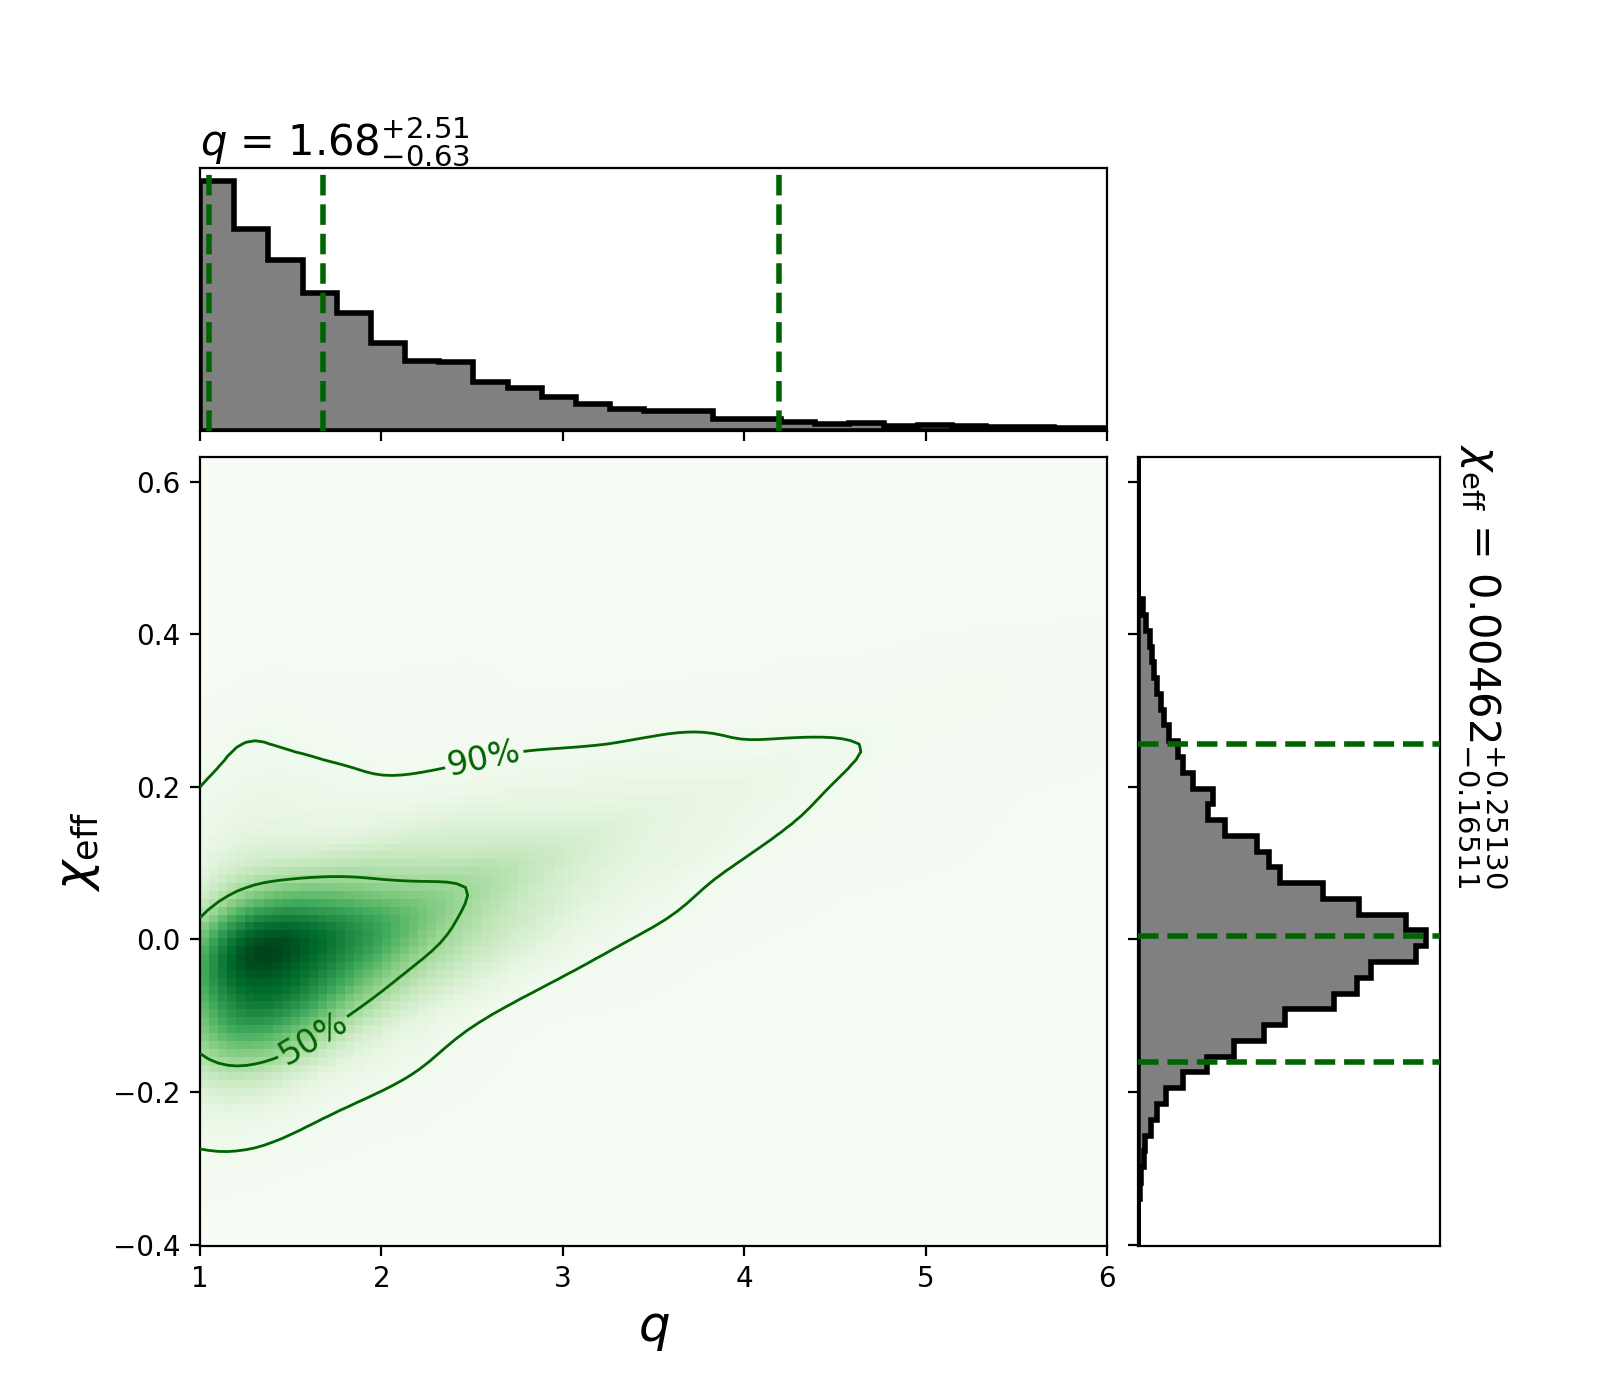

In [38]:
Image('q_chieff_lvt151012.png')

### Fig 6c : posterior density plot for $\iota - d_L$

In [22]:
!pycbc_inference_plot_posterior --verbose \
    --input-file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf \
    --output-file iota_dl_lvt151012.png \
    --plot-density \
    --density-cmap Greens \
    --z-arg logplr \
    --plot-contours \
    --contour-color darkgreen \
    --plot-marginal \
    --parameters "inclination*180/pi:$\iota$ (deg)" \
                  distance \
    --mins "inclination*180/pi:0" \
    --maxs "inclination*180/pi:180"

/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-07-22 16:12:21,961 Loading parameters
2018-07-22 16:12:21,961 Reading input file posteriors/LVT151012/lvt151012_posteriors_thinned.hdf
2018-07-22 16:12:21,963 Loading samples
2018-07-22 16:12:21,969 Getting likelihood stats
2018-07-22 16:12:21,973 Plotting
/cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.9.2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/cvmfs/oa

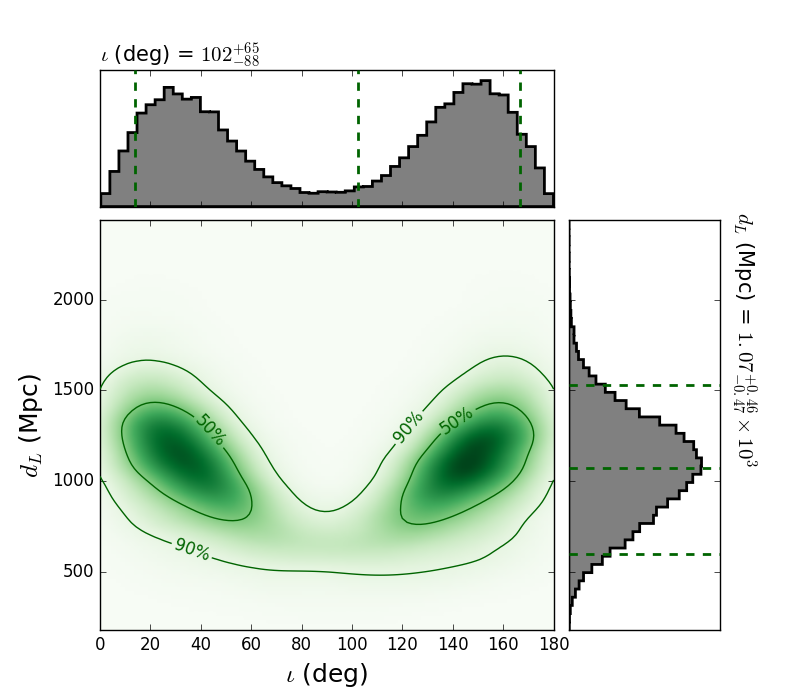

In [23]:
Image('iota_dl_lvt151012.png')

## Funding

This work was supported by NSF awards PHY-1404395 (DAB, CMB), PHY-1707954 (DAB, SD), and PHY-1607169 (SD). SD was also supported by the Inaugural Kathy '73 and Stan '72 Walters Endowed Fund for Science Research Graduate Fellowship at Syracuse University. Computations were supported by Syracuse University and NSF award OAC-1541396. We also acknowledge the Max Planck Gesellschaft for support and the Atlas cluster computing team at AEI Hannover. The authors thank the LIGO Scientific Collaboration for access to the data and gratefully acknowledge the support of the United States National Science Foundation (NSF) for the construction and operation of the LIGO Laboratory and Advanced LIGO as well as the Science and Technology Facilities Council (STFC) of the United Kingdom, and the Max-Planck-Society (MPS) for support of the construction of Advanced LIGO. Additional support for Advanced LIGO was provided by the Australian Research Council. This research has made use of data obtained from the LIGO Open Science Center (https://losc.ligo.org).